In [1]:
import numpy as np
import ice_funcs as icef
import snowflake_plot as snp

import matplotlib.pyplot as plt

In [4]:
# initialising snowflake class
SnowflakeSim = icef.SnowflakeSimulation(1001)

# defining physical parameters
""" GAS KINETICS """
SnowflakeSim.PhysicsU.X_0 = 1
SnowflakeSim.PhysicsU.v_kin = 1 # not sure this does much except time

""" ATTACHMENT """
SnowflakeSim.PhysicsU.max_alpha = 1
SnowflakeSim.PhysicsU.b = 1

""" GEOMETRY CONTROL """
SnowflakeSim.PhysicsU.D_x = 1
# SnowflakeSim.PhysicsU.G = 1 # should actually be good!
# SnowflakeSim.PhysicsU.H = 1 # this too

print("Starting simulation")

final_ice_map = SnowflakeSim.run_simulation(5000)

Starting simulation
Iteration 0
Iteration 100
Iteration 200
Iteration 300
Iteration 400
Iteration 500
Iteration 600
Iteration 700
Iteration 800
Iteration 900
Iteration 1000
Iteration 1100
Iteration 1200
Iteration 1300
Iteration 1400
Iteration 1500
Iteration 1600
Iteration 1700
Iteration 1800
Iteration 1900
Iteration 2000
Iteration 2100
Iteration 2200
Iteration 2300
Iteration 2400
Iteration 2500
Iteration 2600
Iteration 2700
Iteration 2800
Iteration 2900
Iteration 3000
Iteration 3100
Iteration 3200
Iteration 3300
Iteration 3400
Iteration 3500
Iteration 3600
Iteration 3700
Iteration 3800
Iteration 3900
Iteration 4000
Iteration 4100
Iteration 4200
Iteration 4300
Iteration 4400
Iteration 4500
Iteration 4600
Iteration 4700
Iteration 4800
Iteration 4900


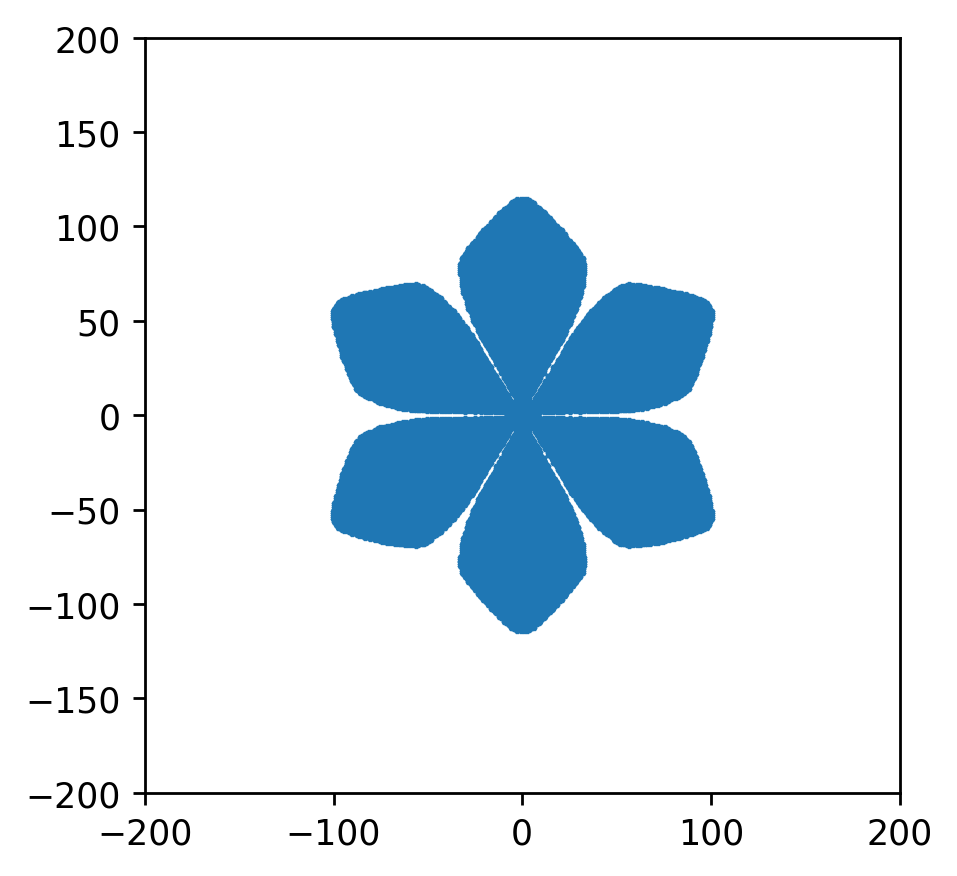

In [6]:
L = 1001
demi_largeur = 200

params = {"figure.dpi":250}
plt.rcParams.update(params)

converter = snp.CoordsFromIceMap(L)
R = converter.convert_ice_map_to_all_coords(final_ice_map)



plt.figure()

plt.plot(R[:,0], R[:,1], marker="H", linewidth=0, markersize=124/demi_largeur)

plt.xlim(-demi_largeur, demi_largeur)
plt.ylim(-demi_largeur, demi_largeur)
plt.gca().set_aspect(1)

plt.show()